### Imports

In [1]:
from ipynb.fs.full._Functions import *

# Shor's Algorithm for Prime Factorization

Peter Shor is well known for developing Shor's algorithm for prime factorization, which allows to factor a number into its prime factors faster than any classical algorithm known to this day. This algorithm is of great relevance because it implies that (given hardware with a sufficient amount of qubits) public key cryptography, e.g. protocols such as RSA, might be broken using quantum computers. 

Shor's algorithm has complexity $\mathcal{O}\left((\log N)^2(\log\log N)(\log\log\log N)\right)$, which is almost an exponential speed up from the best known classical factoring algorithm, the general number field sieve, that has complexity $\mathcal{O}\left(e^{1.9(\log N)^{1/3}(\log \log N)^{2/3}}\right)$. This is the reason why Shor's algorithm is probably the most heard of quantum algorithm and is often hyped up on media.

Shor's algorithm is hybrid, meaning that it has a quantum part and a classical part. The quantum part serves the function of period finding and the classical part solves the factoring problem from the results that the quantum part gives us. And what exactly are we finding the period of?

**The problem**

We want to get the period of $f(x)=a^x\: \text{mod}\: N$; where $N$ is the number to factor, and $a$ is an integer less than $N$. The period, $r$, is the smallest but greater than 0 integer such that $a^r\: \text{mod}\: N=1$. Let's represent this graphically. First, start with the graph of some function of the form $f(x)=a^x\: \text{mod}\: N$. Arbitrarily, we choose to use $f(x)=3^x\: \text{mod}\: 20$.

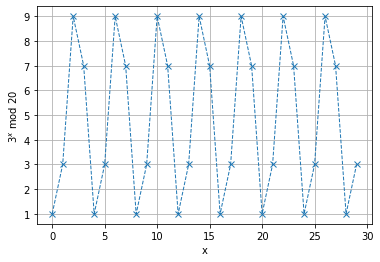

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(start=0, stop=29, num=30)
plt.plot(x, (3**x) % 20, 'x--', linewidth=1)
plt.xlabel('x', fontsize=10)
plt.ylabel('$3^x$ mod 20', fontsize=10)
plt.grid(b=True)
plt.show()

As you can see, this graph repeats itself after a couple of integers in the $x$ axis. This is what we are looking for. In this particular case, you can see that $r=4$, since the graph repeats every 4 integers. Also, note that $f(4)=3^4\: \text{mod}\: 20=81 \: \text{mod} \: 20 =1$. Let's see how to get the value of $r$ for any $a$ and $N$ with a quantum computer.

**Quantum Phase Estimation**

To get the period for equations of the form $f(x)=a^x\: \text{mod}\: N$, we will use quantum phase estimation. QPE estimates $\theta$ in $U |\psi\rangle = e^{2\pi i \theta} |\psi\rangle$ for a given unitary $U$. Without getting too much into detail, QPE uses an arbitrary number of counting qubits (on which the precision of the algorithm relies) in which we write the phase of $U$. The phase is written on the Fourier basis, thus we then use the inverse Quantum Fourier Transform to translate into the computational basis that we then measure. With this general idea of QPE, we can carry on with Shor's algorithm.

We will define $U$ from QPE as a unitary operator that performs the following operation:

$$ U |y \rangle = |ay \: \text{mod} \: N \rangle $$

Let's take the example we analyzed in the previous section, where $a=3$ and $N=20$. Each time we apply $U$, the initial state will get multiplied $a \: \text{mod} \: N$. Therefore, applying $U$ multiple times is equal to succesive multiplication and moreover equal to exponentiation. Therefore, considering $|1\rangle$ as the initial state and applying the $U$ operator $r$ (period) times will take us back to $|1\rangle$. Let's see this for our example.

$$
\begin{align}
U |1\rangle &= |3 \: \text{mod} \: 20 \rangle = |3\rangle \\
U |3\rangle &= |9 \: \text{mod} \: 20 \rangle = |9\rangle \\
U |9\rangle &= |27 \: \text{mod} \: 20 \rangle = |7\rangle \\
U |7\rangle &= |21 \: \text{mod} \: 20 \rangle = |1\rangle \\
\end{align}
$$

With this into account, we can see that a superposition of the above four states is an eigenstate of $U$. This may not be obvious at first, but let's see why it works. We define the eigenstate as 

$$
|\lambda_0\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}|a^k \: \text{mod} \: N\rangle.
$$

We divide by $\sqrt{r}$ because we want an equal superposition of the $r$ possible states. Then, the sum just produces each of these states. Continuing with our example, this eigenstate of $U$ would be 

$$
|\lambda_0\rangle = \frac{1}{2}\left(|1\rangle + |3\rangle + |9\rangle + |7\rangle \right).
$$

And why is this an eigenstate of $U$? Well, think about what happens when you apply $U$ to this gate. The first state turns into the second, the second into the third, the third into the fourth, and the fourth back to the first. Therefore, we can say that $|\lambda_0\rangle$ has an eigenvalue of 1. And this works for any $|\lambda_0\rangle$! But this state doesn't have any phase, so there's not much we can do with QPE in this case. Let's look at another eigenstate.

This time, the eigenstate we are going to look at has some phase information. We define it as 

$$
|\lambda_1\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1} e^{-\frac{2\pi i k}{r}} |a^k \: \text{mod} \: N\rangle.
$$

This time, it may be even more unclear how this is an eigenstate of $U$. Therefore, let's define $|\lambda_1\rangle$ for our particular example and then apply the operator to see what happens. 

$$
|\lambda_1\rangle = \frac{1}{2}\left(|1\rangle + e^{-\frac{2 \pi i}{4}}|3\rangle + e^{-\frac{4 \pi i}{4}}|9\rangle + e^{-\frac{6 \pi i}{4}}|7\rangle \right)
$$

Now we apply $U$.

$$
\begin{align}
U|\lambda_1\rangle &= \frac{1}{2}\left(|3\rangle + e^{-\frac{2 \pi i}{4}}|9\rangle + e^{-\frac{4 \pi i}{4}}|7\rangle + e^{-\frac{6 \pi i}{4}}|1\rangle \right) \\
&= e^{\frac{2 \pi i}{4}} \cdot \frac{1}{2} \left( e^{-\frac{2 \pi i}{4}}|3\rangle + e^{-\frac{4 \pi i}{4}}|9\rangle + e^{-\frac{6 \pi i}{4}}|7\rangle + e^{-\frac{8 \pi i}{4}}|1\rangle \right)
\end{align}
$$

And since $e^{-\frac{8 \pi i}{4}} = e^{-2 \pi i} = 1$,

$$
U|\lambda_1\rangle = e^{\frac{2 \pi i}{4}} |\lambda_1\rangle.
$$

This can be generalized as $U|\lambda_1\rangle=e^{\frac{2 \pi i}{r}}|\lambda_1\rangle$. Also, we can generalize this eigenstates to 

$$
|\lambda_s\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1} e^{-\frac{2\pi i s k}{r}} |a^k \: \text{mod} \: N\rangle,
$$

for some integer $0 \leq s \leq r - 1$. And its eigenvalue is $e^{\frac{2 \pi i s}{r}}$. Something important to note here is the following equality.

$$
\begin{align}
\frac{1}{\sqrt{r}} \sum_{s=0}^{r-1} |\lambda_s\rangle = &\frac{1}{2}(|\lambda_0\rangle + |\lambda_1\rangle + |\lambda_2\rangle + |\lambda_3\rangle) \\
= &\frac{1}{2}\Big( \frac{1}{2}(|1\rangle + |3\rangle + |9\rangle + |7\rangle) \\
&+ \frac{1}{2} \left(|1\rangle + e^{-\frac{2 \pi i}{4}}|3\rangle + e^{-\frac{4 \pi i}{4}}|9\rangle + e^{-\frac{6 \pi i}{4}}|7\rangle \right) \\
&+ \frac{1}{2} \left(|1\rangle + e^{-\frac{4 \pi i}{4}}|3\rangle + e^{-\frac{8 \pi i}{4}}|9\rangle + e^{-\frac{12 \pi i}{4}}|7\rangle \right) \\
&+ \frac{1}{2} \left(|1\rangle + e^{-\frac{6 \pi i}{4}}|3\rangle + e^{-\frac{12 \pi i}{4}}|9\rangle + e^{-\frac{18 \pi i}{4}}|7\rangle \right)\Big) = |1\rangle
\end{align}
$$

Now, here is where QPE comes in. We can estimate the phase of $U$ acting on $|1\rangle$, which will in turn be the phase of one of the $|\lambda_s\rangle$ eigenstates, although we don't know which one. Since QPE calculates $\theta$ in $e^{2 \pi i \theta}$ and our eigenvalues are of the form $e^{\frac{2 \pi i s}{r}}$, we will get $\frac{s}{r}$ from QPE. How do we get $r$ from this value?

**Continued fractions algorithm**

http://www.math.umd.edu/~lcw/three68.pdf

To do:
- Continued fractions algorithm
- Factoring algorithm after period is found
- Qiskit implementation

**References**
- [1] https://arxiv.org/abs/quant-ph/9508027
- [2] https://qiskit.org/textbook/ch-algorithms/shor.html